## Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from shapely.geometry import Point

## Definition to visualize the shapefile

In [9]:
def plot_shapefile(shapefile_path):
    shapefile = gpd.read_file(shapefile_path)
    shapefile.plot()

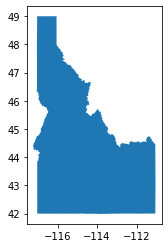

In [10]:
shapefile_path = r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.shp"
plot_shapefile(shapefile_path)

## Definition to extract number of points/vertices in a Shapefile and storing points in CSV

In [15]:
def count_shapefile_points(shapefile_path, output_csv_path):
    idaho_shp = gpd.read_file(shapefile_path)
    total_points = 0
    
    for index, row in idaho_shp.iterrows():
        shape = row['geometry']
        points = mapping(shape)['coordinates']
        total_points += len(points[0])
        
        #to_csv
        pts_list = list(map(lambda x: [x[0], x[1]], points[0]) )
        tuple_cord_df = pd.DataFrame(pts_list, columns=['Longitude', 'Latitude'])
        tuple_cord_df.to_csv(output_csv_path,  index=False)
        
    print(f"Points written to {output_csv_path} successfully.")    
    return print("Total number of points/vertices of a given Shapefile is:", total_points)
    

In [16]:
shapefile_path = r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.shp"
output_csv_path = r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.csv"
total_points = count_shapefile_points(shapefile_path,output_csv_path)

Points written to C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.csv successfully.
Total number of points/vertices of a given Shapefile is: 35242


## Definition to form a shape from the obtained geometric points

Example csv format 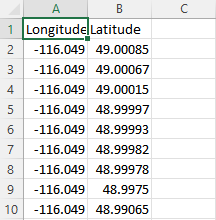

In [19]:
def to_shape(input_csv_path):
    cord_df = pd.read_csv(input_csv_path )

    geometry = [Point(xy) for xy in zip(cord_df['Longitude'], cord_df['Latitude'])]
    cord_gdf = gpd.GeoDataFrame(cord_df, geometry=geometry)
    plt.show()
    return cord_gdf.plot(color='blue', linewidth=0.05)

<Axes: >

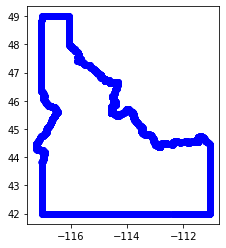

In [20]:
input_csv_path = r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.csv"
to_shape(input_csv_path)

In [17]:
cord_df = pd.read_csv( r"C:\Users\ramak\Desktop\Map_generalization_Douglus_peucker\pre_generalized_shapefiles\Idaho.csv")

geometry = [Point(xy) for xy in zip(cord_df['Longitude'], cord_df['Latitude'])]
cord_gdf = gpd.GeoDataFrame(cord_df, geometry=geometry)

print(cord_gdf)

        Longitude   Latitude                     geometry
0     -116.049086  49.000846  POINT (-116.04909 49.00085)
1     -116.049087  49.000671  POINT (-116.04909 49.00067)
2     -116.049087  49.000147  POINT (-116.04909 49.00015)
3     -116.049087  48.999973  POINT (-116.04909 48.99997)
4     -116.049086  48.999935  POINT (-116.04909 48.99993)
...           ...        ...                          ...
35237 -116.051729  49.000893  POINT (-116.05173 49.00089)
35238 -116.049418  49.000911  POINT (-116.04942 49.00091)
35239 -116.049350  49.000897  POINT (-116.04935 49.00090)
35240 -116.049153  49.000858  POINT (-116.04915 49.00086)
35241 -116.049086  49.000846  POINT (-116.04909 49.00085)

[35242 rows x 3 columns]


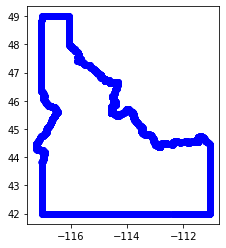

In [18]:
cord_gdf.plot(color='blue', linewidth=0.05)

plt.show()